Text(0, 0.5, 'Paramètre 1')

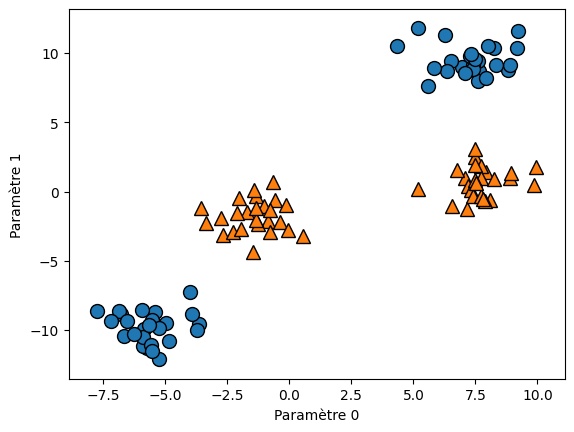

In [2]:
%matplotlib inline 
# On ajout des caractéristiques supplémentaires pour surdimensionner le modèle de sorte que
# les modèles connus puissent intégrer les solutions.
# ( on transforme l'espace des solutions pour y déceler un sous-ensemble )

import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs
import mglearn

X,y = make_blobs(centers=4, random_state=8)
y = y%2

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("Paramètre 0")
plt.ylabel("Paramètre 1")
# Deux classes, impossibilité de trouver une frontière linéaire dans un espace à deux dimensions

Text(0.5, 0, 'Carré du paramètre 1')

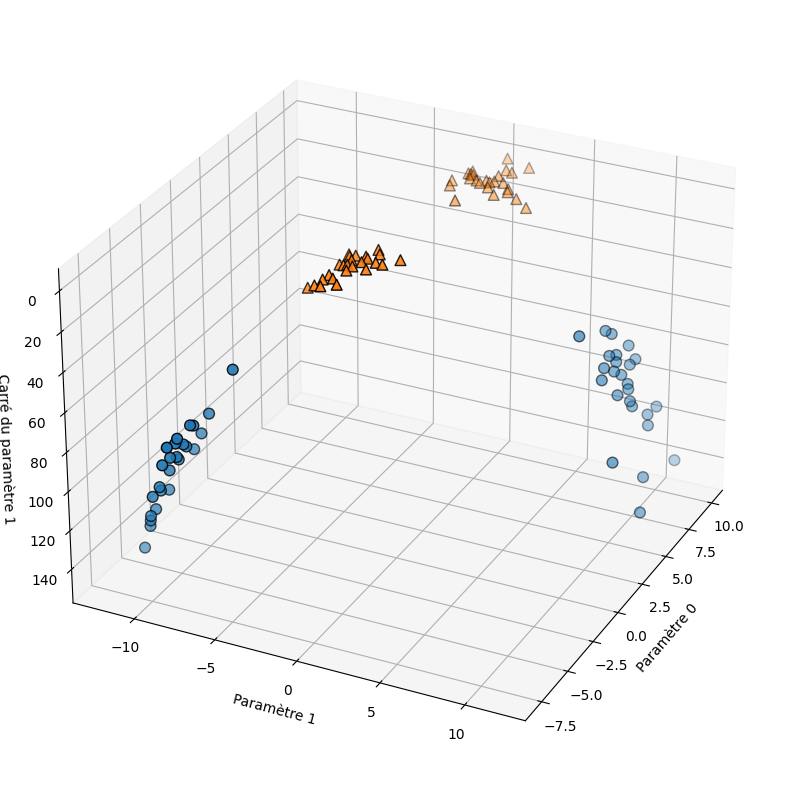

In [27]:
# En ajoutant le carré du second paramètre ( on rend la formule de prédiction quadratique ) ce qui transforme 
# la ligne du modèle linéaire en conique dans un espace de dimension 2

import numpy as np
from mpl_toolkits.mplot3d import Axes3D, axes3d

X_new = np.hstack([X,X[:,1:]**2])
figure = plt.figure(figsize=(20,10))
# Avant la version 1.0
# ax = Axes3D(figure, elev=-152, azim=-26,roll=30)
# Après la versin 1.0
ax = figure.add_subplot(111,projection='3d')
ax.view_init(elev=-152, azim=-26)
mask = y == 0

ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2],  s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2],
          marker='^', s=60, edgecolor='k')
ax.set_xlabel("Paramètre 0")
ax.set_ylabel("Paramètre 1")
ax.set_zlabel("Carré du paramètre 1")

Text(0.5, 0, 'Carré du paramètre 1')

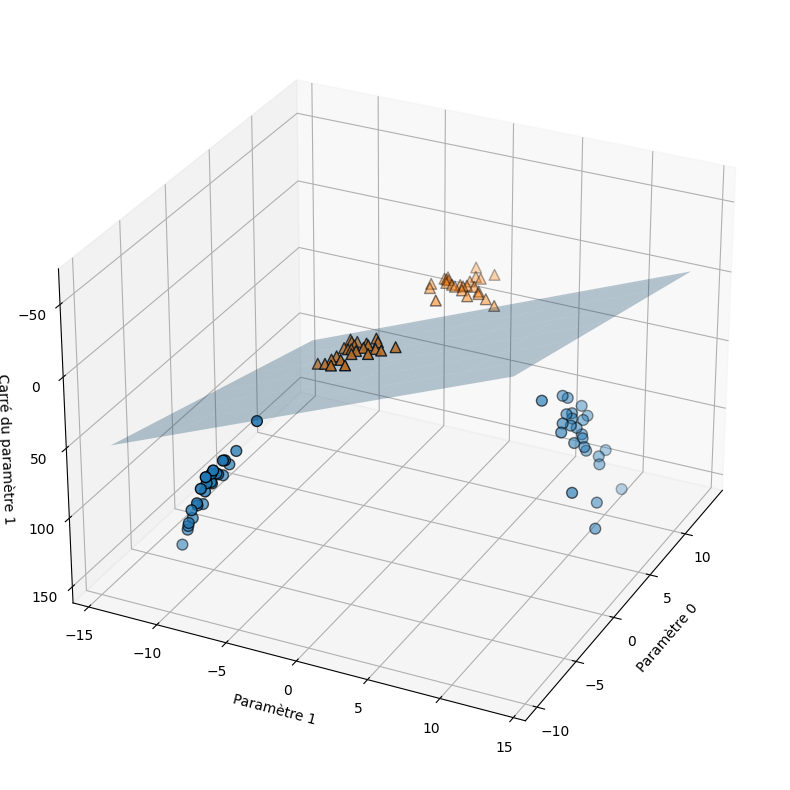

In [38]:
from sklearn.svm import LinearSVC

linear_svm_3d = LinearSVC(loss='hinge',max_iter=5000).fit(X_new,y)
coef, biais = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_.ravel()

figure = plt.figure(figsize=(20,10))

ax = figure.add_subplot(111,projection='3d')
ax.view_init(elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,1].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

XX,YY = np.meshgrid(xx,yy)
# Dessin de la frontière pour 
#     coef0*XX + coef1*YY + coef2*ZZ = ^y^ avec ^y^ = 0 
# <=> coef0*XX + coef1*YY = -coef2*ZZ
# <=> (coef0*XX + coef1*YY)/-coef2 = ZZ
ZZ = (coef[0] * XX + coef[1] * YY + biais ) / -coef[2]

mask = y == 0
ax.plot_surface(XX,YY,ZZ, rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2],  s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2],
          marker='^', s=60, edgecolor='k')
ax.set_xlabel("Paramètre 0")
ax.set_ylabel("Paramètre 1")
ax.set_zlabel("Carré du paramètre 1")

Text(0, 0.5, 'Paramètre 1')

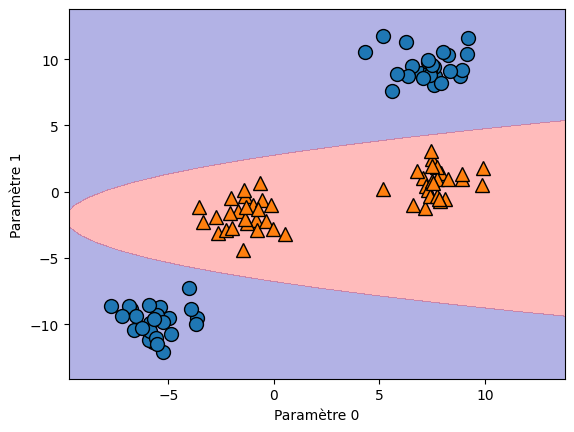

In [42]:
# En deux dimensions la conique suivante : 
ZZ = YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Paramètre 0")
plt.ylabel("Paramètre 1")